In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [389]:
x_limit = 35
rssi_ymin = -180
rssi_ymax = -150
time_ymin = 0
time_ymax = 1100

reader_power = 0.50118723363

In [390]:

def dBmtodB(col):
    # copy
    vals = np.asarray(col)
    # convert col to watts
    vals = vals / 10
    vals = 10**vals
    watts = vals / 1000
    
    # ratio in magnitude
    mags = watts / reader_power
    
    # convert to dB
    dB = 20 * np.log10(mags)
    return dB
    
test = [27, 27, 27]
dBmtodB(test)

array([-4.72694038e-11, -4.72694038e-11, -4.72694038e-11])

In [392]:
def plot_rssi_time(filename, title, failure_thickness):
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Create a figure with one subplot
    fig, ax1 = plt.subplots(1, 1)

    # Scatter plot the first column with error bars
    ax1.errorbar(df['Height'], dBmtodB(df['RSSI']), yerr=1.96*df['SE_RSSI'], fmt='o', label='RSSI', 
                 color='orange', capsize=7, ecolor='b')
    ax1.set_xlim(-1, x_limit)
    ax1.set_ylim(rssi_ymin, rssi_ymax)

    # Create a second y-axis
    ax2 = ax1.twinx()

    # Scatter plot the second column with error bars
    ax2.errorbar(df['Height'], df['Time'], yerr=1.96*df['SE_TIME'], fmt='o', label='Read Time', 
                 color='gray', capsize=7, ecolor='black')
    ax2.set_xlim(-1, x_limit)
    ax2.set_ylim(time_ymin, time_ymax)
        
    # Set the y-axis labels
    ax1.set_ylabel('RSSI (dB)', fontsize=16)
    ax2.set_ylabel('Read Time (ms)', fontsize=16)
    # Set the x-axis label
    ax1.set_xlabel('Sample Thickness (mm)', fontsize=16)
    
    # Plot a vertical line at failure point
    ax1.axvline(failure_thickness, color='red', linestyle='dashed', label='Read Failure')
    # Shade the region to the right of the vertical line
    ax1.fill_between([failure_thickness, x_limit], rssi_ymin, rssi_ymax,
                     color='red', alpha=0.15)


    # Create a list of the legend handles and labels from both subplots
    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # Add the handles and labels from the second subplot to the list
    handles += handles2
    labels += labels2

    # Add a legend to the figure, using the combined list of handles and labels
    fig.legend(handles, labels, bbox_to_anchor=(1.4, 0.2), bbox_transform=ax.transAxes)

    plt.title(title, fontsize=22)

    # Show the plot
    plt.show()

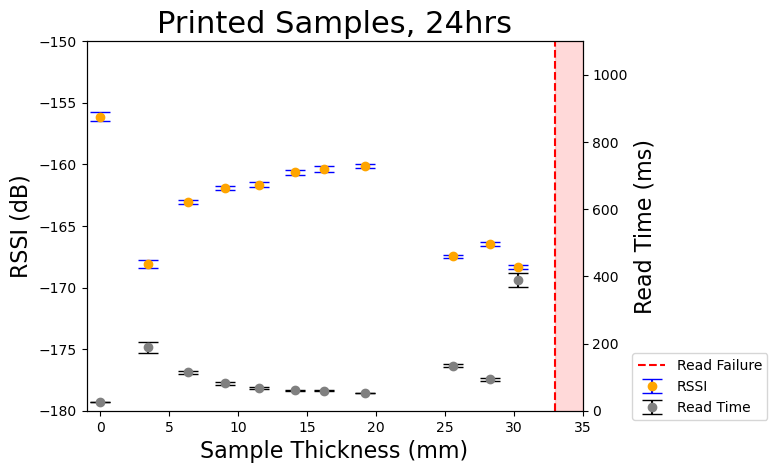

In [393]:
plot_rssi_time('3DP/3DP_Results_24hr.csv', 'Printed Samples, 24hrs', 33)

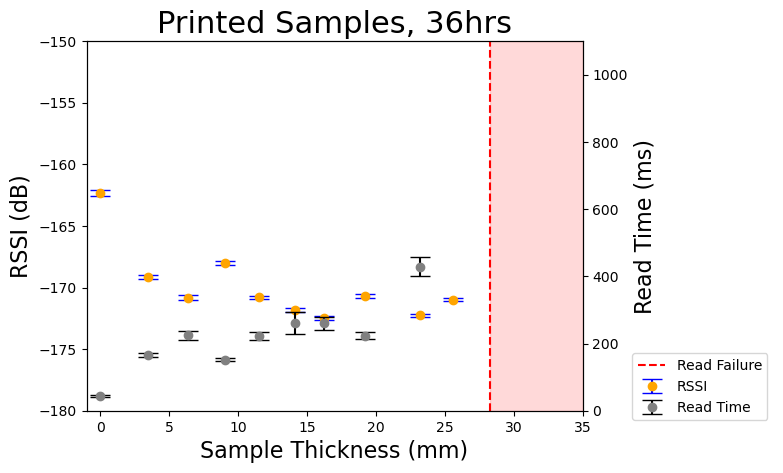

In [394]:
plot_rssi_time('3DP/3DP_Results_36hr.csv', 'Printed Samples, 36hrs', 28.25)

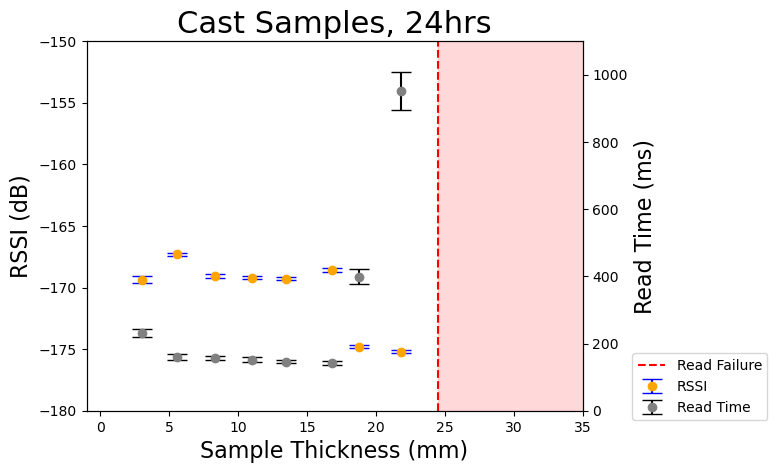

In [395]:
plot_rssi_time('Cast/Cast_Results_24hr.csv', 'Cast Samples, 24hrs', 24.5)

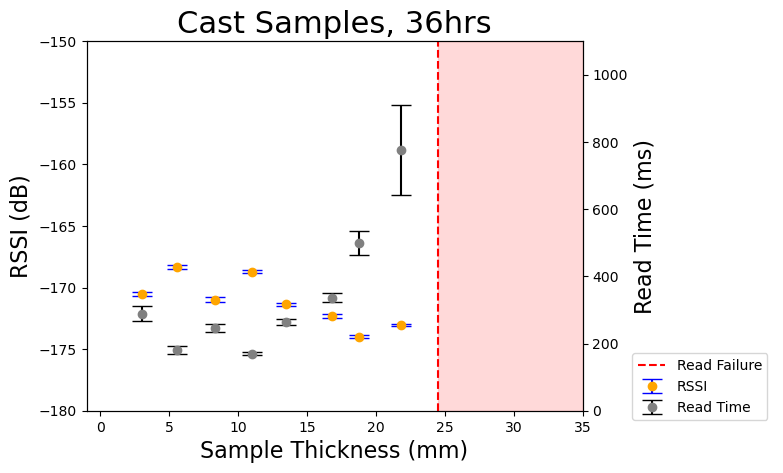

In [413]:
plot_rssi_time('Cast/Cast_Results_36hr.csv', 'Cast Samples, 36hrs', 24.5)

In [411]:
def plot_3dp_cast_rssi(filename_3dp, filename_cast, title, failure_3dp, failure_cast):
    
    # Read the CSVs file into a DataFrame
    df_3dp = pd.read_csv(filename_3dp)
    df_cast = pd.read_csv(filename_cast)

    # Create a figure with one subplot
    fig, ax = plt.subplots(1, 1)
    
    # Plot a vertical line at failure points
    ax.axvline(failure_3dp, color='orange', linestyle='dashed', label='3DP Read Failure')
    ax.axvline(failure_cast, color='gray', linestyle='dashed', label='Cast Read Failure')
     # Shade the region to the right of the vertical line
    ax.fill_between([failure_3dp, x_limit], rssi_ymin, rssi_ymax,
                     color='red', alpha=0.15)
    ax.fill_between([failure_cast, x_limit], rssi_ymin, rssi_ymax,
                     color='red', alpha=0.15)

    # Scatter plot the data with error bars
    ax.errorbar(df_3dp['Height'], dBmtodB(df_3dp['RSSI']), yerr=1.96*df_3dp['SE_RSSI'], fmt='o', label='3DP', 
                 color='orange', capsize=7, ecolor='b')
    ax.errorbar(df_cast['Height'], dBmtodB(df_cast['RSSI']), yerr=1.96*df_cast['SE_RSSI'], fmt='o', label='Cast', 
                 color='gray', capsize=7, ecolor='black')
    ax.set_xlim(-1, x_limit)
    ax.set_ylim(rssi_ymin, rssi_ymax)
        
    # Set the y-axis labels
    ax.set_ylabel('RSSI (dB)', fontsize=16)
    # Set the x-axis label
    ax.set_xlabel('Sample Thickness (mm)', fontsize=16)
    
   

    # Add a legend to the figure, using the combined list of handles and labels
    fig.legend(bbox_to_anchor=(.7, 1), bbox_transform=ax.transAxes)

    plt.title(title, fontsize=22)

    # Show the plot
    plt.show()

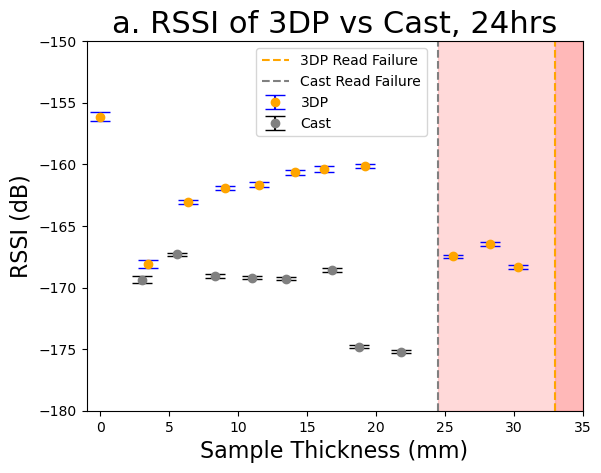

In [446]:
plot_3dp_cast_rssi('3DP/3DP_Results_24hr.csv', 'Cast/Cast_Results_24hr.csv', 'a. RSSI of 3DP vs Cast, 24hrs', 33 ,24.5)

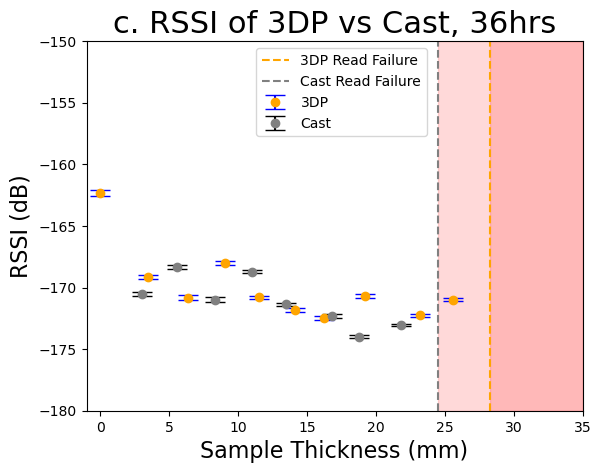

In [448]:
plot_3dp_cast_rssi('3DP/3DP_Results_36hr.csv', 'Cast/Cast_Results_36hr.csv', 'c. RSSI of 3DP vs Cast, 36hrs', 28.25, 24.5)

In [323]:
def plot_3dp_cast_time(filename_3dp, filename_cast, title, failure_3dp, failure_cast):
    
    # Read the CSVs file into a DataFrame
    df_3dp = pd.read_csv(filename_3dp)
    df_cast = pd.read_csv(filename_cast)

    # Create a figure with one subplot
    fig, ax = plt.subplots(1, 1)
    
    # Plot a vertical line at failure points
    ax.axvline(failure_3dp, color='orange', linestyle='dashed', label='3DP Read Failure')
    ax.axvline(failure_cast, color='gray', linestyle='dashed', label='Cast Read Failure')
     # Shade the region to the right of the vertical line
    ax.fill_between([failure_3dp, x_limit], time_ymin, time_ymax,
                     color='red', alpha=0.15)
    ax.fill_between([failure_cast, x_limit], time_ymin, time_ymax,
                     color='red', alpha=0.15)

    # Scatter plot the data with error bars
    ax.errorbar(df_3dp['Height'], df_3dp['Time'], yerr=1.96*df_3dp['SE_TIME'], fmt='o', label='3DP', 
                 color='orange', capsize=7, ecolor='b')
    ax.errorbar(df_cast['Height'], df_cast['Time'], yerr=1.96*df_cast['SE_TIME'], fmt='o', label='Cast', 
                 color='gray', capsize=7, ecolor='black')
    ax.set_xlim(-1, x_limit)
    ax.set_ylim(time_ymin, time_ymax)
        
    # Set the y-axis labels
    ax.set_ylabel('Read Time (ms)', fontsize=16)
    # Set the x-axis label
    ax.set_xlabel('Sample Thickness (mm)', fontsize=16)
    
   

    # Add a legend to the figure, using the combined list of handles and labels
    fig.legend(bbox_to_anchor=(0.39, 1), bbox_transform=ax.transAxes)

    plt.title(title, fontsize=22)

    # Show the plot
    plt.show()

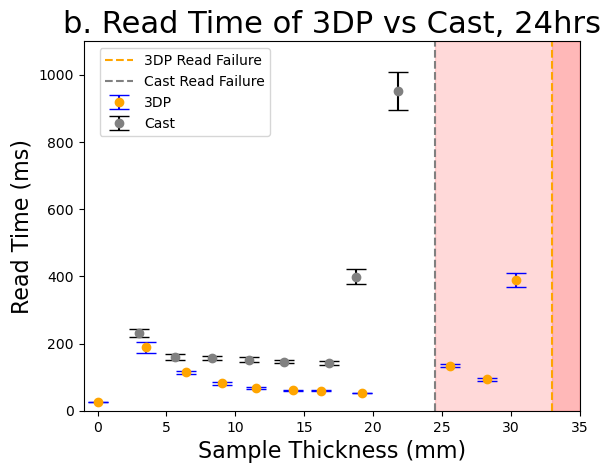

In [447]:
plot_3dp_cast_time('3DP/3DP_Results_24hr.csv', 'Cast/Cast_Results_24hr.csv', 'b. Read Time of 3DP vs Cast, 24hrs', 33, 24.5)

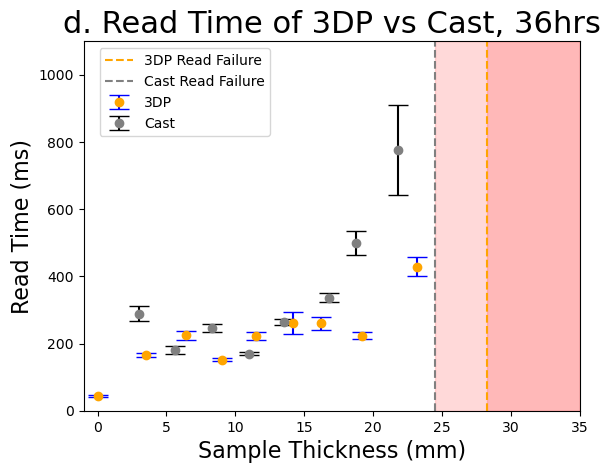

In [449]:
plot_3dp_cast_time('3DP/3DP_Results_36hr.csv', 'Cast/Cast_Results_36hr.csv', 'd. Read Time of 3DP vs Cast, 36hrs', 28.25, 24.5)

In [443]:
def plot_cure_rssi(filename_t1, filename_t2, title, failure_t1, failure_t2):
    
    # Read the CSVs file into a DataFrame
    df_t1 = pd.read_csv(filename_t1)
    df_t2 = pd.read_csv(filename_t2)

    # Create a figure with one subplot
    fig, ax = plt.subplots(1, 1)
    
    # Plot a vertical line at failure points
    ax.axvline(failure_t1, color='green', linestyle='dashed', label='24hrs Read Failure')
    ax.axvline(failure_t2, color='blue', linestyle='dashed', label='36hrs Read Failure')
    # Shade the region to the right of the vertical line
    ax.fill_between([failure_t1, x_limit], rssi_ymin, rssi_ymax,
                     color='red', alpha=0.15)
    ax.fill_between([failure_t2, x_limit], rssi_ymin, rssi_ymax,
                     color='red', alpha=0.15)

    # Scatter plot the data with error bars
    ax.errorbar(df_t1['Height'], dBmtodB(df_t1['RSSI']), yerr=1.96*df_t1['SE_RSSI'], fmt='o', label='24hrs', 
                 color='green', capsize=7, ecolor='gray')
    ax.errorbar(df_t2['Height'], dBmtodB(df_t2['RSSI']), yerr=1.96*df_t2['SE_RSSI'], fmt='o', label='36hrs', 
                 color='blue', capsize=7, ecolor='black')
    ax.set_xlim(-1, x_limit)
    ax.set_ylim(rssi_ymin, rssi_ymax)
        
    # Set the y-axis labels
    ax.set_ylabel('RSSI (dB)', fontsize=16)
    # Set the x-axis label
    ax.set_xlabel('Sample Thickness (mm)', fontsize=16)
    
   

    # Add a legend to the figure, using the combined list of handles and labels
    fig.legend(bbox_to_anchor=(0.8, 1), bbox_transform=ax.transAxes)

    plt.title(title, fontsize=22)

    # Show the plot
    plt.show()

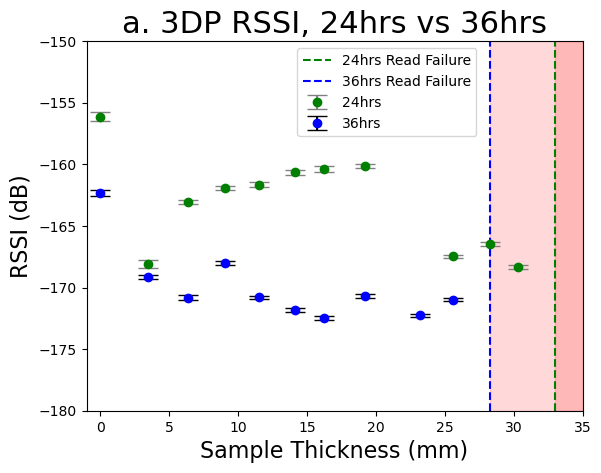

In [444]:
plot_cure_rssi('3DP/3DP_Results_24hr.csv', '3DP/3DP_Results_36hr.csv', 'a. 3DP RSSI, 24hrs vs 36hrs', 33, 28.25)

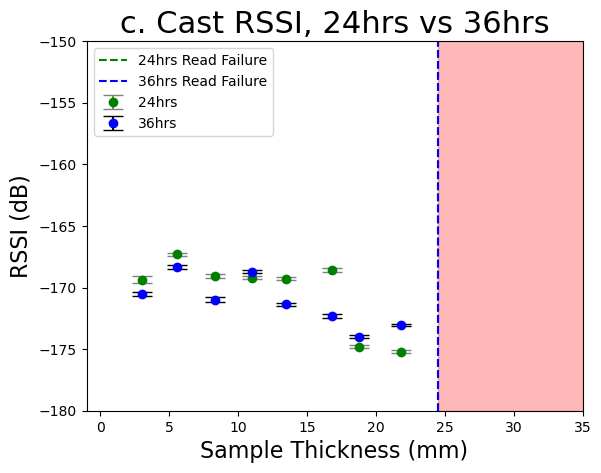

In [436]:
plot_cure_rssi('Cast/Cast_Results_24hr.csv', 'Cast/Cast_Results_36hr.csv', 'c. Cast RSSI, 24hrs vs 36hrs', 24.5, 24.5)

In [303]:
def plot_cure_time(filename_t1, filename_t2, title, failure_t1, failure_t2):
    
    # Read the CSVs file into a DataFrame
    df_t1 = pd.read_csv(filename_t1)
    df_t2 = pd.read_csv(filename_t2)

    # Create a figure with one subplot
    fig, ax = plt.subplots(1, 1)
    
    # Plot a vertical line at failure points
    ax.axvline(failure_t1, color='green', linestyle='dashed', label='24hrs Read Failure')
    ax.axvline(failure_t2, color='blue', linestyle='dashed', label='36hrs Read Failure')
    # Shade the region to the right of the vertical line
    ax.fill_between([failure_t1, x_limit], time_ymin, time_ymax,
                     color='red', alpha=0.15)
    ax.fill_between([failure_t2, x_limit], time_ymin, time_ymax,
                     color='red', alpha=0.15)

    # Scatter plot the data with error bars
    ax.errorbar(df_t1['Height'], df_t1['Time'], yerr=1.96*df_t1['SE_TIME'], fmt='o', label='24hrs', 
                 color='green', capsize=7, ecolor='gray')
    ax.errorbar(df_t2['Height'], df_t2['Time'], yerr=1.96*df_t2['SE_TIME'], fmt='o', label='36hrs', 
                 color='blue', capsize=7, ecolor='black')
    ax.set_xlim(-1, x_limit)
    ax.set_ylim(time_ymin, time_ymax)
        
    # Set the y-axis labels
    ax.set_ylabel('Read Time (ms)', fontsize=16)
    # Set the x-axis label
    ax.set_xlabel('Sample Thickness (mm)', fontsize=16)
    
   

    # Add a legend to the figure, using the combined list of handles and labels
    fig.legend(bbox_to_anchor=(.39, 1), bbox_transform=ax.transAxes)

    plt.title(title, fontsize=22)

    # Show the plot
    plt.show()

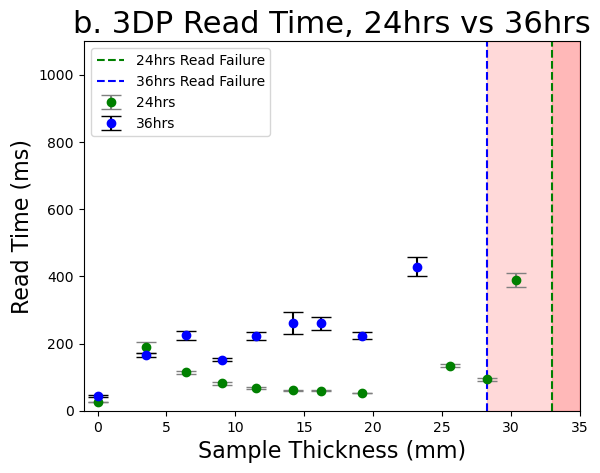

In [445]:
plot_cure_time('3DP/3DP_Results_24hr.csv', '3DP/3DP_Results_36hr.csv', 'b. 3DP Read Time, 24hrs vs 36hrs', 33, 28.25)

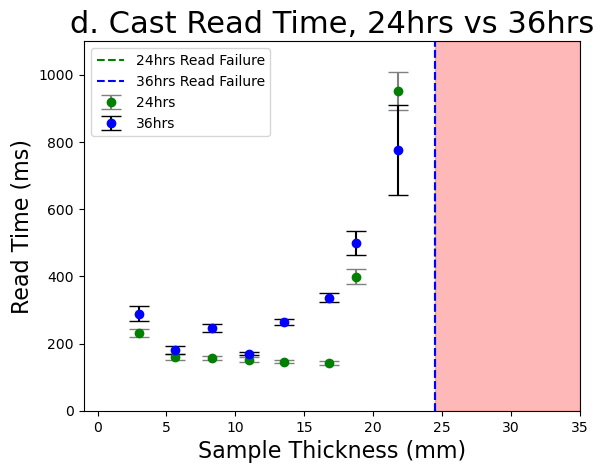

In [433]:
plot_cure_time('Cast/Cast_Results_24hr.csv', 'Cast/Cast_Results_36hr.csv', 'd. Cast Read Time, 24hrs vs 36hrs', 24.5, 24.5)

In [331]:
def plot_rssi_time_angle(filename, title):
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Create a figure with one subplot
    fig, ax1 = plt.subplots(1, 1)

    # Scatter plot the first column with error bars
    ax1.errorbar(df['Angle'], df['RSSI'], yerr=1.96*df['SE_RSSI'], fmt='o', label='RSSI', 
                 color='red', capsize=7, ecolor='black')
    ax1.set_xlim(-10, 325)
    ax1.set_ylim(rssi_ymin, rssi_ymax)
    ax1.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])

    # Create a second y-axis
    ax2 = ax1.twinx()

    # Scatter plot the second column with error bars
    ax2.errorbar(df['Angle'], df['Time'], yerr=1.96*df['SE_TIME'], fmt='o', label='Read Time', 
                 color='purple', capsize=7, ecolor='gray')
    ax2.set_xlim(-10, 325)
    ax2.set_ylim(time_ymin, 175)
    ax2.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
        
    # Set the y-axis labels
    ax1.set_ylabel('RSSI (dBm)', fontsize=16)
    ax2.set_ylabel('Read Time (ms)', fontsize=16)
    # Set the x-axis label
    ax1.set_xlabel('Orientation (degree)', fontsize=16)
    

    # Create a list of the legend handles and labels from both subplots
    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # Add the handles and labels from the second subplot to the list
    handles += handles2
    labels += labels2

    # Add a legend to the figure, using the combined list of handles and labels
    fig.legend(handles, labels, bbox_to_anchor=(0.3, 1), bbox_transform=ax.transAxes)

    plt.title(title, fontsize=22)

    # Show the plot
    plt.show()

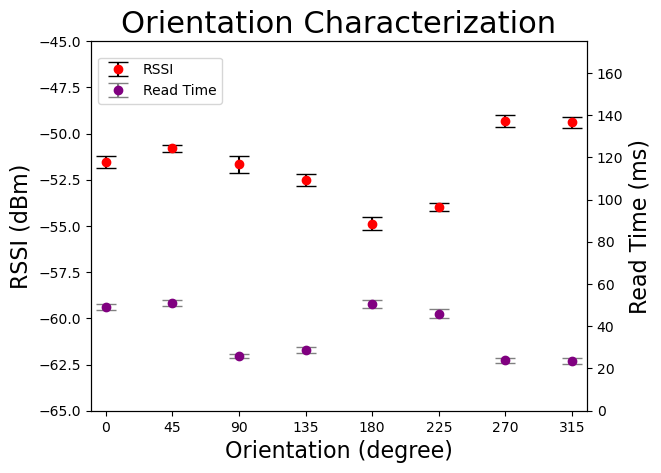

In [332]:
plot_rssi_time_angle('Orientation/Orientation_Results.csv', 'Orientation Characterization')